In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Data Reading & Observation

In [2]:
train = pd.read_csv('/Users/zoey/WPI/kdd/hw3/census/census-income.data',header=None)
# test = pd.read_csv('/Users/zoey/WPI/kdd/hw3/census/census-income.test',header=None)

In [3]:
train_0 = train.drop([24],axis=1)
# test_0 = test.drop([24],axis=1)

In [4]:
train_0.columns = range(0,41)
# test_0.columns = range(0,41)

In [5]:
train_0

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [7]:
train_0.shape

(199523, 41)

In [9]:
train_0.dtypes

0      int64
1     object
2      int64
3      int64
4     object
5      int64
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16     int64
17     int64
18     int64
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29     int64
30    object
31    object
32    object
33    object
34    object
35     int64
36    object
37     int64
38     int64
39     int64
40    object
dtype: object

In [10]:
train_0[40].value_counts()

 - 50000.    187141
 50000+.      12382
Name: 40, dtype: int64

In [12]:
train_0.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
dtype: bool

In [14]:
train_0 = train_0.drop_duplicates()
# test_0 = test_0.drop_duplicates()

In [15]:
train_0.shape

(152896, 41)

# Data Preprocessing

Transfer string attributes to int

In [17]:
def NomToNum(dataset, column):
#     newdata = dataset[:]
    column_lst = dataset[column].unique().tolist()
    le = LabelEncoder()
    le.fit(column_lst)
    dataset[column] = le.transform(dataset[column])
    return dataset

In [18]:
nom2num_lst = [1,4,6,7,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,36,40]

In [19]:
train_1 = train_0[:]
test_1 = test_0[:]

In [20]:
for i in nom2num_lst:
    train_1 = NomToNum(train_1, i)
    test_1 = NomToNum(test_1, i)

In [21]:
train_1.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
dtype: object

In [22]:
test_1.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
35    int64
36    int64
37    int64
38    int64
39    int64
40    int64
dtype: object

one-hot encoding

In [178]:
def onehot(data,columns):
    newdata = data[:]
    x = newdata[columns]
    ohe = OneHotEncoder()
    ohe.fit(x)
    newx = ohe.transform(x).toarray()
    for i in range(len(columns)):
        clm_name = newdata[columns[i]].unique().tolist()
        for j in range(len(clm_name)):
            col_name = str(columns[i]) +"_"+ str(clm_name[j])
            newdata[col_name] = newx[:, i]
    newdata = newdata.drop(columns, axis=1)
    return newdata

In [223]:
nominal_lst = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,39]

In [224]:
train_2 = onehot(train_1, nominal_lst)
test_2 = onehot(test_1, nominal_lst)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/zoey/.local

In [24]:
def getmatshow(data):
    datacorr = data.corr()
    plt.matshow(datacorr)
    plt.show()
    return datacorr

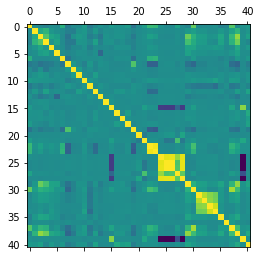

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,-0.020052,-0.058971,-0.093249,-0.003462,-0.013393,0.265512,-0.160447,-0.014995,-0.016074,...,-0.033694,-0.018568,-0.005584,0.024025,-0.100392,-0.065915,0.473668,-0.022852,0.033110,0.098788
1,-0.020052,1.000000,0.226445,0.310896,0.066348,0.010913,-0.007514,-0.105065,-0.113112,0.045147,...,0.053827,0.051611,0.005688,0.005867,0.084597,0.015789,0.159749,0.313429,0.008193,0.068962
2,-0.058971,0.226445,1.000000,0.456712,0.187555,0.130676,-0.014160,-0.211029,0.027796,0.104433,...,0.138205,0.131124,0.045473,0.063295,0.197885,0.016914,0.334689,0.679662,0.024806,0.149585
3,-0.093249,0.310896,0.456712,1.000000,0.061801,0.164644,-0.017360,-0.160342,-0.153954,0.058108,...,0.117827,0.110198,0.016204,-0.008988,0.174755,0.012699,0.301696,0.561844,0.014361,-0.051978
4,-0.003462,0.066348,0.187555,0.061801,1.000000,0.043426,-0.003710,-0.127714,-0.031722,-0.020707,...,0.065441,0.062719,0.066095,0.108222,0.073775,-0.018283,0.008074,0.223455,0.002959,0.097236
5,-0.013393,0.010913,0.130676,0.164644,0.043426,1.000000,0.007337,-0.052194,-0.021899,0.021082,...,0.047758,0.043236,0.025264,0.029246,0.035465,0.003240,0.070985,0.163749,0.007033,0.008950
6,0.265512,-0.007514,-0.014160,-0.017360,-0.003710,0.007337,1.000000,-0.195186,-0.048644,-0.006714,...,-0.019291,-0.013439,-0.014538,-0.014736,-0.079386,-0.013286,-0.080960,0.072516,0.000303,0.073463
7,-0.160447,-0.105065,-0.211029,-0.160342,-0.127714,-0.052194,-0.195186,1.000000,0.074966,-0.013097,...,-0.077127,-0.077024,-0.015035,-0.022086,-0.037418,0.016967,-0.249120,-0.305712,-0.015374,-0.123874
8,-0.014995,-0.113112,0.027796,-0.153954,-0.031722,-0.021899,-0.048644,0.074966,1.000000,0.121042,...,-0.028518,-0.028598,-0.011232,-0.003677,-0.047501,-0.005366,-0.073696,-0.148741,-0.007386,-0.054112
9,-0.016074,0.045147,0.104433,0.058108,-0.020707,0.021082,-0.006714,-0.013097,0.121042,1.000000,...,0.012946,0.012434,-0.005485,0.000788,0.035468,0.001285,0.033596,0.062300,0.002503,0.055517


In [25]:
getmatshow(train_1)

Cut continuous attributes

In [108]:
from sklearn.cluster import KMeans

In [109]:
train_cut = train_1[:]
test_cut = test_1[:]

In [110]:
continuous_clm = [0,5,16,17,18,38]

In [111]:
def kmeans_cut(data,column,k,data_test):
    kmodel = KMeans(n_clusters = k, n_jobs = 4) #建立模型，n_jobs是并行数，一般等于CPU数较好
    kmodel.fit(data[[column]]) #训练模型
    kmean_center = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)  #输出聚类中心，并且排序（默认是随机序的）
    bins = kmean_center.rolling(window=2).mean().iloc[1:]
    bins = [-99999] + list(bins[0]) + [data[column].max()] #把首末边界点加上，w[0]中0为列索引
    data['new_'+str(k)+'cuted_'+str(column)] = pd.cut(data[column],bins,labels=range(k))
    data_test['new_'+str(k)+'cuted_'+str(column)] = pd.cut(data_test[column],bins,labels=range(k))
#     print(bins)
    return data,data_test

In [112]:
for i in continuous_clm:
#     print(i)
    train_cut,test_cut = kmeans_cut(train_cut,i,10,test_cut)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [113]:
train_cut

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,new_10cuted_0,new_10cuted_5,new_10cuted_16,new_10cuted_17,new_10cuted_18,new_10cuted_38
0,73,3,0,0,12,0,2,6,14,6,...,2,0,95,0,8,0,0,0,0,0
1,58,6,4,34,16,0,2,0,4,8,...,2,52,94,0,7,0,0,0,0,9
2,18,3,0,0,0,0,1,4,14,6,...,2,0,95,0,1,0,0,0,0,0
3,9,3,0,0,10,0,2,4,14,6,...,0,0,94,0,0,0,0,0,0,0
4,10,3,0,0,10,0,2,4,14,6,...,0,0,94,0,0,0,0,0,0,0
5,48,4,40,10,16,1200,2,2,6,10,...,2,52,95,0,5,3,0,0,0,9
6,42,4,34,3,9,0,2,2,7,2,...,2,52,94,0,4,0,2,0,0,9
7,28,4,4,40,12,0,2,4,4,4,...,2,30,95,0,2,0,0,0,0,5
8,47,1,43,26,16,876,2,2,5,0,...,2,52,95,0,5,2,0,0,0,9
9,34,4,4,37,16,0,2,2,4,5,...,2,52,94,0,3,0,0,0,0,9


In [114]:
train_classifier = train_cut.drop(continuous_clm,axis=1)
# test_classifier = test_cut.drop(continuous_clm,axis=1)

feature selection

In [118]:
def L1FeatureSelect(train_classifier):
    y_train = train_classifier[40].values
    X_train = train_classifier.drop([40],axis=1).values
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
    model = SelectFromModel(lsvc, prefit=True)
    X_new = model.transform(X_train)
    train_decDim = pd.DataFrame(X_new)
    train_decDim[40] = y_train
    return train_decDim

In [119]:
train_decDim = L1FeatureSelect(train_classifier)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


PCA

In [123]:
def PCAprocess(train_classifier):
    y_train = train_classifier[40].values
    X_train = train_classifier.drop([40],axis=1).values
    pca = PCA(n_components=30)  
    reduced_X = pca.fit_transform(X_train)  
    train_decDim = pd.DataFrame(reduced_X)
    train_decDim[40] = y_train
    return train_decDim

In [124]:
train_decDim_pca = PCAprocess(train_classifier)

# Classification
# -ANN

In [26]:
from sklearn.neural_network import MLPClassifier

In [104]:
y_train = train_1[40].values
X_train = train_1.drop([40],axis=1).values
y_test = test_1[40].values
X_test = test_1.drop([40],axis=1).values

In [105]:
clf = MLPClassifier()
param_grid = {'solver':['lbfgs','sgd','adam'], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'], 
              'hidden_layer_sizes': [(i*10,)*i  for i in range(3,7) ],
              'alpha': [0.001, 0.0001]}    
#activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=adam
grid_search = GridSearchCV(clf, param_grid, n_jobs = 1, verbose=10)    
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)
clf = MLPClassifier(solver=best_parameters['solver'], activation=best_parameters['activation'], hidden_layer_sizes=best_parameters['hidden_layer_sizes'], alpha=best_parameters['alpha']).fit(X_train, y_train)
preds1 = clf.predict(X_test)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs, score=0.722, total=   8.6s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs, score=0.849, total=   8.5s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.1s remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs, score=0.713, total=   4.6s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.7s remaining:    0.0s
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd, score=0.919, total=  53.6s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd, score=0.919, total=  50.6s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.9min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd, score=0.919, total=  47.3s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam, score=0.932, total=  20.5s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.2min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam, score=0.931, total=  14.6s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.5min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam, score=0.930, total=  14.2s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=lbfgs 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.7min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=lbfgs, score=0.880, total=  21.0s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=lbfgs 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=lbfgs, score=0.822, total=  15.8s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=lbfgs 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=lbfgs, score=0.921, total=  12.2s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=sgd, score=0.919, total= 1.2min
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=sgd, score=0.919, total= 1.4min
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=sgd, score=0.919, total= 1.3min
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=adam, score=0.932, total=  49.0s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=adam, score=0.929, total=  14.9s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=adam, score=0.931, total=  43.9s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), solver=lbfgs 


KeyboardInterrupt: 

In [80]:
clf = MLPClassifier(activation='identity', alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver='adam').fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

In [81]:
evaluation(y_test, y_predict)

Confusion Matrix: 
[[138924   1605]
 [  8852   3515]]
Accuracy :  93.16071054834659
AUC :  0.6364015073717832
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    140529
           1       0.69      0.28      0.40     12367

    accuracy                           0.93    152896
   macro avg       0.81      0.64      0.68    152896
weighted avg       0.92      0.93      0.92    152896



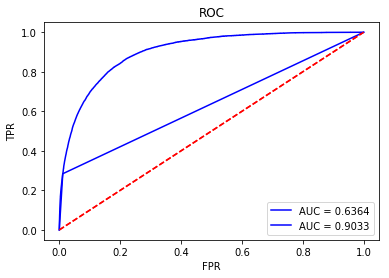

In [82]:
plot_roc(y_test, y_predict)
plot_roc(y_test, y_pred_prob[:,1])

Cross Validation

In [85]:
def CrossValidation(train_classifier,k):
    y_cv = train_classifier[40].values
    X_cv = train_classifier.drop([40],axis=1).values
    kf = KFold(n_splits=k)
    kf.get_n_splits(X_cv)
    X_train_lst = []
    X_test_lst = []
    y_train_lst = []
    y_test_lst = []
    for train_index, test_index in kf.split(X_cv):
        X_train, X_test = X_cv[train_index], X_cv[test_index]
        y_train, y_test = y_cv[train_index], y_cv[test_index]
        X_train_lst.append(X_train)
        X_test_lst.append(X_test)
        y_train_lst.append(y_train)
        y_test_lst.append(y_test)
    return(X_train_lst,X_test_lst,y_train_lst,y_test_lst)

Get Evaluation and Plot ROC

In [87]:
def evaluation(y_test, y_pred):
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred)) 
    print("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("AUC : ",auc(false_positive_rate, true_positive_rate))
    print("Report : ")
    print(classification_report(y_test, y_pred)) 

In [88]:
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

In [134]:
def MLP_classifier(train_classifier):
    X_train_lst,X_test_lst,y_train_lst,y_test_lst = CrossValidation(train_classifier,10)
    AUC_lst = []
    Accuracy_lst=[]
    for i in range(len(y_test_lst)):
        y_train = y_train_lst[i]
        X_train = X_train_lst[i]
        y_test = y_test_lst[i]
        X_test = X_test_lst[i]

        clf = MLPClassifier(activation='identity', alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver='adam').fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test)
        
        print("Confusion Matrix: ")
        print(confusion_matrix(y_test, y_predict)) 
        print("Accuracy : ", accuracy_score(y_test,y_predict)*100) 
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print("AUC : ",auc(false_positive_rate, true_positive_rate))
        print("Report : ")
        print(classification_report(y_test, y_predict)) 
#         plot_roc(y_test, y_predict)
        plot_roc(y_test, y_pred_prob[:,1])
        
        AUC_lst.append(auc(false_positive_rate, true_positive_rate))
        Accuracy_lst.append(accuracy_score(y_test,y_predict)*100)
            
    Accuracy_avg = np.mean(Accuracy_lst)
    AUC_avg = np.mean(AUC_lst)
    print('average Accuracy after cross validation:',Accuracy_avg)
    print('average AUC after cross validation:',AUC_avg)
    return AUC_lst

Confusion Matrix: 
[[14095   102]
 [  836   257]]
Accuracy :  93.86527141922826
AUC :  0.9117461061738686
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14197
           1       0.72      0.24      0.35      1093

    accuracy                           0.94     15290
   macro avg       0.83      0.61      0.66     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[14038    97]
 [  863   292]]
Accuracy :  93.72138652714193
AUC :  0.9059996600498901
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14135
           1       0.75      0.25      0.38      1155

    accuracy                           0.94     15290
   macro avg       0.85      0.62      0.67     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[14012    68]
 [ 1031   179]]
Accuracy :  92.81229561805101
AUC :  0.890338179705109
Report : 

[0.9117461061738686,
 0.9059996600498901,
 0.890338179705109,
 0.9034437455389008,
 0.9003059045272553,
 0.9058712101563531,
 0.9015219012817091,
 0.8971228549791399,
 0.8997665778776258,
 0.8837610196404584]

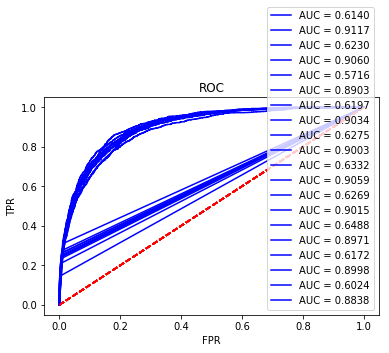

In [133]:
MLP_classifier(train_1)

Confusion Matrix: 
[[14008   189]
 [  741   352]]
Accuracy :  93.91759319816873
AUC :  0.9185498257076721
Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14197
           1       0.65      0.32      0.43      1093

    accuracy                           0.94     15290
   macro avg       0.80      0.65      0.70     15290
weighted avg       0.93      0.94      0.93     15290

Confusion Matrix: 
[[14048    87]
 [  851   304]]
Accuracy :  93.86527141922826
AUC :  0.9140095584170576
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14135
           1       0.78      0.26      0.39      1155

    accuracy                           0.94     15290
   macro avg       0.86      0.63      0.68     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[13998    82]
 [  945   265]]
Accuracy :  93.28319162851537
AUC :  0.9022714359504133
Report :

[0.9185498257076721,
 0.9140095584170576,
 0.9022714359504133,
 0.9074598501070664,
 0.9038319968017472,
 0.908222413119751,
 0.9052141998499084,
 0.8987851534789084,
 0.9060309629952831,
 0.8899921882727307]

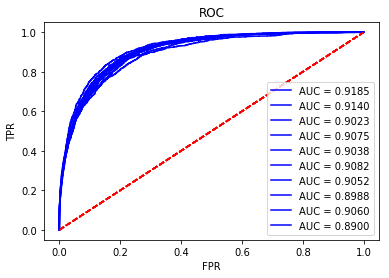

In [135]:
MLP_classifier(train_classifier)

Confusion Matrix: 
[[14019   178]
 [  748   345]]
Accuracy :  93.94375408763898
AUC :  0.9181881653411694
Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14197
           1       0.66      0.32      0.43      1093

    accuracy                           0.94     15290
   macro avg       0.80      0.65      0.70     15290
weighted avg       0.93      0.94      0.93     15290

Confusion Matrix: 
[[13939   196]
 [  760   395]]
Accuracy :  93.74754741661216
AUC :  0.9138453410756205
Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14135
           1       0.67      0.34      0.45      1155

    accuracy                           0.94     15290
   macro avg       0.81      0.66      0.71     15290
weighted avg       0.93      0.94      0.93     15290

Confusion Matrix: 
[[13786   294]
 [  744   466]]
Accuracy :  93.2112491824722
AUC :  0.9020899171205861
Report : 

[0.9181881653411694,
 0.9138453410756205,
 0.9020899171205861,
 0.9072082719932192,
 0.9036315286115222,
 0.907587190348741,
 0.9057887335509434,
 0.8986011886432222,
 0.9062894889645854,
 0.8898507103939046]

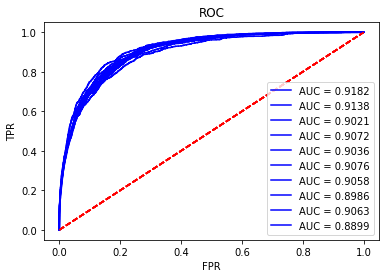

In [136]:
MLP_classifier(train_decDim)

Confusion Matrix: 
[[14095   102]
 [  837   256]]
Accuracy :  93.85873119686069
AUC :  0.9081015015414066
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14197
           1       0.72      0.23      0.35      1093

    accuracy                           0.94     15290
   macro avg       0.83      0.61      0.66     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[13919   216]
 [  761   394]]
Accuracy :  93.61020274689339
AUC :  0.9017015881182842
Report : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14135
           1       0.65      0.34      0.45      1155

    accuracy                           0.94     15290
   macro avg       0.80      0.66      0.71     15290
weighted avg       0.93      0.94      0.93     15290

Confusion Matrix: 
[[13923   157]
 [  891   319]]
Accuracy :  93.1458469587966
AUC :  0.8882996219947408
Report : 

[0.9081015015414066,
 0.9017015881182842,
 0.8882996219947408,
 0.8971896747858672,
 0.8929438950045544,
 0.8985730929385054,
 0.8935642531118912,
 0.8846024682994258,
 0.898636241666219,
 0.8765609096700568]

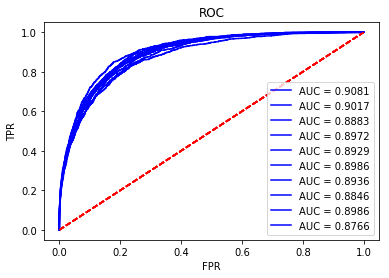

In [137]:
MLP_classifier(train_decDim_pca)

# Experiment
# GQ1

In [99]:
train_0[12]

0          Female
1            Male
2          Female
3          Female
4          Female
5          Female
6            Male
7          Female
8          Female
9            Male
10         Female
11         Female
12           Male
13         Female
14         Female
15         Female
16         Female
17         Female
18         Female
19           Male
20           Male
21           Male
22         Female
23           Male
24         Female
25           Male
26         Female
27           Male
28         Female
29           Male
           ...   
199486     Female
199487       Male
199488     Female
199489       Male
199490       Male
199491       Male
199492       Male
199495       Male
199497     Female
199498     Female
199499     Female
199500     Female
199502       Male
199503     Female
199504     Female
199505     Female
199507     Female
199508       Male
199509     Female
199510       Male
199511     Female
199513     Female
199514     Female
199515     Female
199516    

In [106]:
train_gq1 = train_1.drop([12],axis=1)

In [128]:
train_decDim_gq1 = train_decDim.drop([12],axis=1)

Confusion Matrix: 
[[14133    64]
 [  901   192]]
Accuracy :  93.68868541530412
AUC :  0.890139573706054
Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14197
           1       0.75      0.18      0.28      1093

    accuracy                           0.94     15290
   macro avg       0.85      0.59      0.63     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[14041    94]
 [  894   261]]
Accuracy :  93.53826030085023
AUC :  0.8929666466065476
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14135
           1       0.74      0.23      0.35      1155

    accuracy                           0.94     15290
   macro avg       0.84      0.61      0.66     15290
weighted avg       0.92      0.94      0.92     15290

Confusion Matrix: 
[[14012    68]
 [  991   219]]
Accuracy :  93.07390451275343
AUC :  0.8792085368144253
Report : 

[0.890139573706054,
 0.8929666466065476,
 0.8792085368144253,
 0.8820374955389008,
 0.8870343849137063,
 0.8885389258334756,
 0.8864581978973493,
 0.877569662567661,
 0.8878956577362619,
 0.8672793652346762]

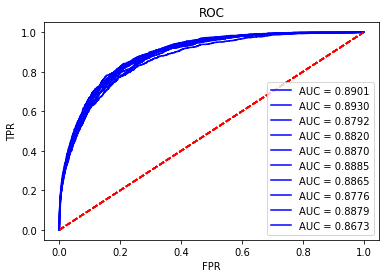

In [138]:
MLP_classifier(train_gq1)

Confusion Matrix: 
[[14117    80]
 [  843   250]]
Accuracy :  93.96337475474166
AUC :  0.9184459095742106
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14197
           1       0.76      0.23      0.35      1093

    accuracy                           0.94     15290
   macro avg       0.85      0.61      0.66     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[14035   100]
 [  835   320]]
Accuracy :  93.88489208633094
AUC :  0.9136536827162932
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14135
           1       0.76      0.28      0.41      1155

    accuracy                           0.94     15290
   macro avg       0.85      0.63      0.69     15290
weighted avg       0.93      0.94      0.93     15290

Confusion Matrix: 
[[13873   207]
 [  823   387]]
Accuracy :  93.26357096141268
AUC :  0.9030384227084899
Report :

[0.9184459095742106,
 0.9136536827162932,
 0.9030384227084899,
 0.907108789480728,
 0.9036645839222665,
 0.907509552010062,
 0.9059341205157858,
 0.8988144646771548,
 0.9062799845365166,
 0.8899309813422558]

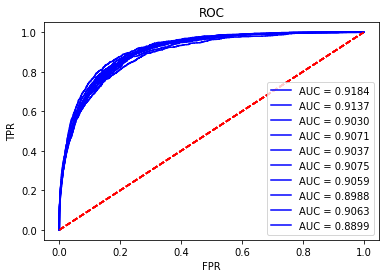

In [139]:
MLP_classifier(train_decDim_gq1)

# Experiment: 
# GQ2

In [ ]:
# feature importance from LGBM
# 0, 35
# 1, 5
# 2, 15
# 3, 62
# 4, 2
# 5, 2
# 6, 0
# 7, 3
# 8, 0
# 9, 16
# 10, 0
# 11, 0
# 12, 91
# 13, 0
# 14, 0
# 15, 0
# 16, 180
# 17, 49
# 18, 86
# 19, 16
# 20, 0
# 21, 0
# 22, 8
# 23, 0
# 24, 0
# 25, 0
# 26, 0
# 27, 0
# 28, 0
# 29, 22
# 30, 0
# 31, 0
# 32, 0
# 33, 0
# 34, 0
# 35, 0
# 36, 1
# 37, 0
# 38, 107
# 39, 0

In [143]:
train_classifier.columns

Index([               1,                2,                3,                4,
                      6,                7,                8,                9,
                     10,               11,               12,               13,
                     14,               15,               19,               20,
                     21,               22,               23,               24,
                     25,               26,               27,               28,
                     29,               30,               31,               32,
                     33,               34,               35,               36,
                     37,               39,               40,  'new_10cuted_0',
        'new_10cuted_5', 'new_10cuted_16', 'new_10cuted_17', 'new_10cuted_18',
       'new_10cuted_38'],
      dtype='object')

In [146]:
selected_clm = [0,1,2,3,9,12,16,17,18,19,22,29,38,40]
train_selected = train_1[selected_clm]

Confusion Matrix: 
[[13456   741]
 [  535   558]]
Accuracy :  91.65467625899281
AUC :  0.8951141115144812
Report : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14197
           1       0.43      0.51      0.47      1093

    accuracy                           0.92     15290
   macro avg       0.70      0.73      0.71     15290
weighted avg       0.92      0.92      0.92     15290

Confusion Matrix: 
[[14063    72]
 [  906   249]]
Accuracy :  93.60366252452583
AUC :  0.9035419738850938
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14135
           1       0.78      0.22      0.34      1155

    accuracy                           0.94     15290
   macro avg       0.86      0.61      0.65     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[13982    98]
 [  944   266]]
Accuracy :  93.18508829300197
AUC :  0.8952363119834711
Report :

[0.8951141115144812,
 0.9035419738850938,
 0.8952363119834711,
 0.8992996631870093,
 0.8954285284711021,
 0.8996821391740493,
 0.8875498974678317,
 0.887013057739639,
 0.9005271807854945,
 0.8788656085117517]

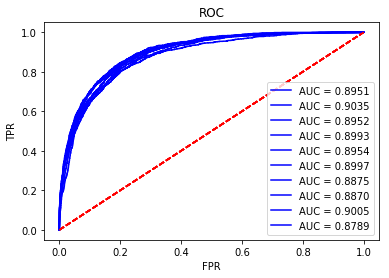

In [148]:
MLP_classifier(train_selected)

In [149]:
selected_clm2 = [0,2,3,9,12,16,17,18,29,38,40]
train_selected2 = train_1[selected_clm2]

Confusion Matrix: 
[[14087   110]
 [  822   271]]
Accuracy :  93.90451275343362
AUC :  0.9086392232267414
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14197
           1       0.71      0.25      0.37      1093

    accuracy                           0.94     15290
   macro avg       0.83      0.62      0.67     15290
weighted avg       0.93      0.94      0.93     15290

Confusion Matrix: 
[[14042    93]
 [  891   264]]
Accuracy :  93.56442119032047
AUC :  0.9009521053171566
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14135
           1       0.74      0.23      0.35      1155

    accuracy                           0.94     15290
   macro avg       0.84      0.61      0.66     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[13892   188]
 [  859   351]]
Accuracy :  93.15238718116416
AUC :  0.893614352460556
Report : 

[0.9086392232267414,
 0.9009521053171566,
 0.893614352460556,
 0.8929815756602427,
 0.8956479349004958,
 0.899473062727866,
 0.8982830138754878,
 0.8909731203766432,
 0.9005657234516458,
 0.8821022905537126]

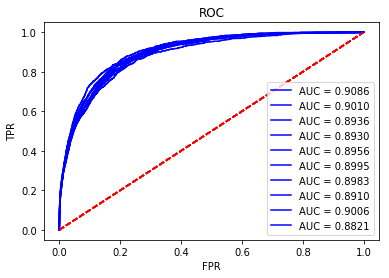

In [150]:
MLP_classifier(train_selected2)

In [152]:
selected_clm3 = [3,12,16,18,38,40]
train_selected3 = train_1[selected_clm3]

Confusion Matrix: 
[[14161    36]
 [  933   160]]
Accuracy :  93.66252452583387
AUC :  0.8964289647678231
Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14197
           1       0.82      0.15      0.25      1093

    accuracy                           0.94     15290
   macro avg       0.88      0.57      0.61     15290
weighted avg       0.93      0.94      0.92     15290

Confusion Matrix: 
[[14051    84]
 [  927   228]]
Accuracy :  93.38783518639634
AUC :  0.8878601059358046
Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14135
           1       0.73      0.20      0.31      1155

    accuracy                           0.93     15290
   macro avg       0.83      0.60      0.64     15290
weighted avg       0.92      0.93      0.92     15290

Confusion Matrix: 
[[14043    37]
 [ 1027   183]]
Accuracy :  93.04120340091563
AUC :  0.8695650298178061
Report :

[0.8964289647678231,
 0.8878601059358046,
 0.8695650298178061,
 0.8765496464578872,
 0.8683906122686533,
 0.8814141697252884,
 0.878958893610615,
 0.8715696203686596,
 0.8729517128637131,
 0.8572934359156525]

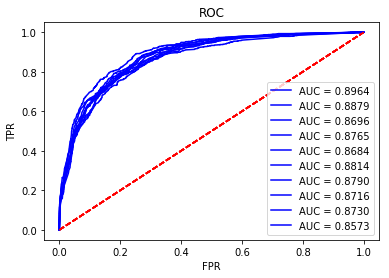

In [153]:
MLP_classifier(train_selected3)

# Experiment: 
# GQ3

In [204]:
from scipy import interp

In [210]:
def CrossValidation2(train_classifier,k):
    y_cv = train_classifier[1].values
    y_cv2 = onehot(train_1[[1]],[1])
    X_cv = train_classifier.drop([1],axis=1).values
    kf = KFold(n_splits=k)
    kf.get_n_splits(X_cv)
    X_train_lst = []
    X_test_lst = []
    y_train_lst = []
    y_test_lst = []
    y_test2_lst = []
    for train_index, test_index in kf.split(X_cv):
        X_train, X_test = X_cv[train_index], X_cv[test_index]
        y_train, y_test,y_test2 = y_cv[train_index], y_cv[test_index],y_cv2[test_index]
        X_train_lst.append(X_train)
        X_test_lst.append(X_test)
        y_train_lst.append(y_train)
        y_test_lst.append(y_test)
        y_test2_lst.append(y_test2)
    return(X_train_lst,X_test_lst,y_train_lst,y_test_lst,y_test2_lst)

In [199]:
def onehot(data,columns):
    newdata = data[:]
    x = newdata[columns]
    ohe = OneHotEncoder()
    ohe.fit(x)
    newx = ohe.transform(x).toarray()
    return newx

In [159]:
X_train_lst,X_test_lst,y_train_lst,y_test_lst = CrossValidation2(train_classifier,10)
clf = MLPClassifier()
param_grid = {'solver':['lbfgs','sgd','adam'], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'], 
              'hidden_layer_sizes': [(i*10,)*i  for i in range(1,5) ],
              'alpha': [0.001, 0.0001]}    
#activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=adam
grid_search = GridSearchCV(clf, param_grid, n_jobs = 1, verbose=10)    
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)
clf = MLPClassifier(solver=best_parameters['solver'], activation=best_parameters['activation'], hidden_layer_sizes=best_parameters['hidden_layer_sizes'], alpha=best_parameters['alpha']).fit(X_train, y_train)
preds1 = clf.predict(X_test)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=lbfgs 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=lbfgs, score=0.879, total=   2.5s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=lbfgs 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=lbfgs, score=0.919, total=   1.4s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=lbfgs 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=lbfgs, score=0.922, total=   2.9s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=sgd 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s remaining:    0.0s
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.5s remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=sgd, score=0.919, total=  23.7s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.2s remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=sgd, score=0.919, total=  22.6s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.3min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=sgd, score=0.919, total=  24.1s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=adam 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.7min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=adam, score=0.928, total=  27.5s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=adam 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=adam, score=0.924, total=  26.1s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=adam 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.6min remaining:    0.0s


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(10,), solver=adam, score=0.920, total=  25.9s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=lbfgs 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.858, total=   3.7s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=lbfgs 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.864, total=   5.9s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=lbfgs 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=lbfgs, score=0.886, total=   2.1s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=sgd, score=0.919, total=  32.0s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=sgd, score=0.919, total=  33.8s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=sgd, score=0.919, total=  34.9s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=adam, score=0.922, total=  18.5s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=adam, score=0.931, total=  19.5s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(20, 20), solver=adam, score=0.925, total=  22.4s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs, score=0.782, total=   7.3s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=lbfgs 
[CV]  activation=identity, alpha=0.0

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd, score=0.919, total=  14.9s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd, score=0.919, total=  10.2s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:749: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=sgd, score=0.919, total=   0.8s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam, score=0.164, total=   0.1s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam, score=0.922, total=   1.2s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam 
[CV]  activation=identity, alpha=0.001, hidden_layer_sizes=(30, 30, 30), solver=adam, score=0.925, total=  11.5s
[CV] activation=identity, alpha=0.001, hidden_layer_sizes=(40, 40, 40, 40), solver=lbfgs 


/Users/zoey/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [217]:
def MLP_classifier2(train_classifier):
    X_train_lst,X_test_lst,y_train_lst,y_test_lst,y_test2_lst = CrossValidation2(train_classifier,10)
    AUC_lst = []
    Accuracy_lst=[]
    for i in range(len(y_test_lst)):
        y_train = y_train_lst[i]
        X_train = X_train_lst[i]
        y_test = y_test_lst[i]
        y_test2 = y_test2_lst[i]
        X_test = X_test_lst[i]
        
        clf = MLPClassifier(activation='identity', alpha=0.001, hidden_layer_sizes=(40,40,40,40), solver='adam').fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test)
        print(y_pred_prob)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(7):
            fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_pred_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(7):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= 7
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        print("Confusion Matrix: ")
        print(confusion_matrix(y_test, y_predict)) 
        print("Accuracy : ", accuracy_score(y_test,y_predict)*100) 
#         print("fpr : ",fpr)
#         print("tpr : ",tpr)
        print("AUC : ",roc_auc)
        
        AUC_lst.append(roc_auc["macro"])
        Accuracy_lst.append(accuracy_score(y_test,y_predict)*100)
            
    Accuracy_avg = np.mean(Accuracy_lst)
    AUC_avg = np.mean(AUC_lst)
    print('average Accuracy after cross validation:',Accuracy_avg)
    print('average AUC after cross validation:',AUC_avg)
    return AUC_lst

In [214]:
MLP_classifier2(train_1)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[4.54039454e-10 5.21225124e-10 5.81655800e-05 ... 2.60285042e-05
  7.73684768e-11 3.24843509e-06]
 [5.31963115e-06 6.84937652e-05 1.98876137e-28 ... 5.10109902e-01
  4.23587516e-06 1.90039718e-03]
 [8.72942705e-10 7.67520265e-10 2.52280211e-03 ... 1.26345649e-05
  2.39914334e-10 4.21162987e-06]
 ...
 [1.16198209e-09 1.37701247e-09 3.11436495e-04 ... 7.60725891e-06
  4.14681367e-10 2.73286648e-06]
 [1.16969709e-06 3.12909145e-05 1.42390808e-19 ... 8.81733689e-02
  2.44018314e-06 1.42264674e-02]
 [5.55736945e-10 3.28640700e-10 1.46713283e-66 ... 2.77513053e-05
  8.13516396e-11 1.49334054e-06]]
Confusion Matrix: 
[[  52   36    0    0  185    0    4   10    0]
 [  32  238    0    0  413    1    4   10    0]
 [   0    0   31    0    0    0    0    0    0]
 [   0    0    0 6147    0    0    0    0    0]
 [  16   62    0    8 6499    8   66    2    0]
 [   1    0    0    4  227    7   57    0    0]
 [   0    2    0    1  556    8  161    0    0]
 [  47   83    0    0  286    0    6    5    

[[5.52309735e-06 1.20790306e-04 2.24405975e-41 ... 3.17300645e-01
  5.75209877e-06 2.25990369e-03]
 [1.03575275e-09 8.92460755e-10 1.82235144e-07 ... 2.64211908e-05
  1.70235521e-10 4.12218127e-06]
 [9.97209855e-05 2.35988845e-04 6.17861134e-13 ... 3.26476714e-01
  4.96758553e-05 1.43269612e-03]
 ...
 [1.18957877e-09 1.35968043e-09 6.57444123e-06 ... 1.02936431e-04
  1.32206846e-10 6.49057214e-06]
 [1.20479354e-09 7.67218279e-10 2.02721205e-07 ... 6.37866348e-06
  1.46873762e-10 1.17147998e-06]
 [9.72687299e-04 4.91577654e-04 1.18420074e-17 ... 5.78148663e-03
  9.02413073e-05 9.43755869e-04]]
Confusion Matrix: 
[[  44   24    0    0  223    0    2    3    0]
 [  17  133    0    1  636    0    4    3    0]
 [   0    0   36    3    0    0    0    0    0]
 [   0    0    0 5148    0    0    0    0    0]
 [   2   25    3   32 7140    0  140    0    0]
 [   0    1    0    8  234    0  113    0    0]
 [   0    1    0    6  581    0  297    0    0]
 [  27   43    0    0  322    0    8    2    

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [218]:
MLP_classifier2(train_1)

/Users/zoey/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[1.97685440e-09 9.16567395e-10 1.92296963e-04 ... 8.84279320e-05
  1.37224713e-10 2.92818207e-06]
 [1.23437669e-05 5.23066301e-05 3.22932612e-10 ... 5.31934932e-01
  6.39854730e-06 2.44938434e-03]
 [2.03130773e-09 6.89330614e-10 2.97164358e-01 ... 9.97294379e-06
  2.05450937e-10 1.32028265e-06]
 ...
 [3.43952574e-09 1.42407054e-09 3.46371460e-02 ... 7.93267245e-06
  3.78798435e-10 1.18203685e-06]
 [4.94005292e-06 4.81140287e-05 3.85977151e-04 ... 1.08528905e-01
  5.61664790e-06 5.84124279e-03]
 [1.67573954e-09 4.96880116e-10 5.60873199e-04 ... 7.21451861e-05
  9.04005946e-11 1.84892416e-06]]
Confusion Matrix: 
[[   1   99    0    0  173    3    1   10    0]
 [   1  327    0    0  362    1    2    5    0]
 [   0    0   28    3    0    0    0    0    0]
 [   0    0   11 6135    0    0    1    0    0]
 [   0  133    0   19 6426   17   66    0    0]
 [   0    0    0    4  225   18   49    0    0]
 [   0    2    0    3  548   12  163    0    0]
 [   1  158    0    0  255    0    3   10    

[[5.48524683e-05 1.40959830e-04 1.97325285e-09 ... 3.32386971e-01
  1.86545962e-05 2.05995529e-03]
 [3.74028353e-09 3.79215723e-09 4.00216909e-06 ... 7.74842264e-05
  1.22225060e-09 4.83141413e-06]
 [3.52885344e-04 6.69925083e-04 7.05047818e-09 ... 2.12123703e-01
  2.42363049e-04 1.82154122e-03]
 ...
 [4.61593993e-09 4.15534150e-09 3.93006146e-05 ... 2.04528388e-04
  8.23096827e-10 5.66831980e-06]
 [8.39806367e-09 7.48001023e-09 6.33433082e-06 ... 4.01660762e-05
  2.12617710e-09 4.54669488e-06]
 [1.86595454e-03 1.04657458e-03 4.90863242e-08 ... 1.10869708e-02
  3.14599400e-04 1.36898449e-03]]
Confusion Matrix: 
[[  53   74    0    0  167    1    0    1    0]
 [  29  311    0    0  453    0    1    0    0]
 [   0    0   14   25    0    0    0    0    0]
 [   0    0    0 5146    2    0    0    0    0]
 [  15  151    0   12 7091   15   55    3    0]
 [   0    3    0    1  277   31   42    2    0]
 [   0    6    0    1  692   24  159    3    0]
 [  38  137    0    0  225    1    0    1    

[0.9483583639678543,
 0.946107258174774,
 0.9482498918680253,
 0.9423732680637205,
 0.9414792112196897,
 0.9438295317962556,
 0.9475291905878301,
 0.943981963601635,
 0.943513380408957,
 0.9399719347222998]

# Regression

# Advanced: 
# Classification-Try LSTM